https://numpy.org/doc/2.1/reference/generated/numpy.linalg.solve.html

In [4]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Vektoren

In [3]:
a = array([1,2,3]) #Vektor Definition
print(a.shape)
print(a)

(3,)
[1 2 3]


In [4]:
b = array([[5, 6, 7]]) # Matrix, 1 Reihenvektor
print(b.shape)
print(b)

(1, 3)
[[1 2 3]]


In [5]:
c = array([[8, 9, 10]]).T # Matrix, 1 Spaltenvektor
print(c.shape)
print(c)

(3, 1)
[[1]
 [2]
 [3]]


In [128]:
b*c

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [129]:
b@c

array([[14]])

In [130]:
c@b

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [131]:
cross(a,b)

array([[0, 0, 0]])

In [136]:
dot(b,c)

array([[14]])

## dot vs @
Scheinbar ist `@` ein klein wenig schneller, wobei der unterschied nicht signifikant wirkt.

In [141]:
%%timeit
dot(b,c)

899 ns ± 20.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [142]:
%%timeit
b@c

816 ns ± 31.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [10]:
A = np.array([
    [2, 1.5, 1],
    [1.5, 1, 1],
    [0.1, 0.05, 0.02]
])


In [11]:
A

array([[2.  , 1.5 , 1.  ],
       [1.5 , 1.  , 1.  ],
       [0.1 , 0.05, 0.02]])

In [12]:
A.shape

(3, 3)

In [19]:
A_inv = linalg.inv(A)
print(A_inv)

[[ -1.5    1.    25.  ]
 [  3.5   -3.   -25.  ]
 [ -1.25   2.5  -12.5 ]]


$AA^{-1} = I$ 

In [21]:
A@A_inv

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-6.07153217e-18, -1.56125113e-17,  1.00000000e+00]])

In [17]:
linalg.det(A)

0.02

In [16]:
λs, Vs = linalg.eig(A) #getting eigen values and corresponding eigenvectors.
for i in range(len(λs)):
    print(f"λ:{λs[i]}, v:{Vs[:,i]}")

λ:(3.1306444585383257+0j), v:[-0.80926838+0.j -0.586369  +0.j -0.0354413 +0.j]
λ:(-0.0553222292691623+0.05768805716671609j), v:[-0.58724473-0.13906159j  0.75140307+0.j          0.08789472+0.25193936j]
λ:(-0.0553222292691623-0.05768805716671609j), v:[-0.58724473+0.13906159j  0.75140307-0.j          0.08789472-0.25193936j]


Trying to solve the following linear system of equations:

$$ \begin{aligned}
    2x + 1.5y + z &= 50, \\
    1.5x + y + z &= 40, \\
    0.1x + 0.05y + 0.02z &= 2.
\end{aligned}$$


The system can be written in matrix form as:
$$ \begin{bmatrix}
2 & 1.5 & 1 \\
1.5 & 1 & 1 \\
0.1 & 0.05 & 0.02
\end{bmatrix}
\begin{bmatrix}
x \\ y \\ z
\end{bmatrix} = \begin{bmatrix} 50 \\ 40 \\ 2 \end{bmatrix} $$

## Using Numpy

In [2]:
# Coefficients matrix
A = np.array([
    [2, 1.5, 1],
    [1.5, 1, 1],
    [0.1, 0.05, 0.02]
])

# Constants vector
b = np.array([50, 40, 2])

# Solve the system
x = np.linalg.solve(A, b)

# Display the result
print(f"x = {x[0]:.2f}, y = {x[1]:.2f}, z = {x[2]:.2f}")

x = 15.00, y = 5.00, z = 12.50


## Using sympy

In [5]:
from sympy import solve
from sympy.abc import x, y, z
equations = [x*2 + 1.5*y + z - 50, 1.5*x + y + z - 40, 0.1*x + 0.05*y + 0.02*z - 2]
solutions = solve(equations, x, y, z, dict=True)
solutions

[{x: 15.0000000000000, y: 5.00000000000000, z: 12.5000000000000}]

## Use matrizes to model probabilistic evolving systems (Markov)
See also: https://www.youtube.com/watch?v=K-8F_zDMDUI&list=PLMrJAkhIeNNTYaOnVI3QpH7jgULnAmvPA&index=3

In [22]:
A = array([[0.5, 0.1, 0.3],
          [0.25, 0.6, 0.2],
          [0.25, 0.3, 0.5]])
A

array([[0.5 , 0.1 , 0.3 ],
       [0.25, 0.6 , 0.2 ],
       [0.25, 0.3 , 0.5 ]])

In [29]:
x_0 = array([[0.2, 0.7, 0.1]]).T
# for i in range(20):

In [30]:
x_0

array([[0.2],
       [0.7],
       [0.1]])

[[0.28571429]
 [0.35714286]
 [0.35714286]]


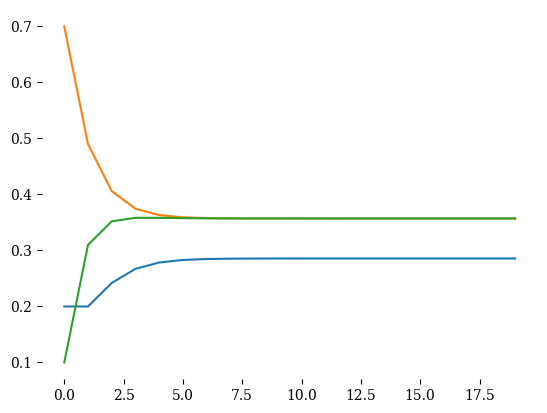

In [39]:
x_n = x_0
N = 20
xs = np.zeros([3, N])
for i in range(N):
    xs[:,i] = x_n[:,0]
    x_n = A@x_n

print(x_n)
plot(xs.T);


In [55]:
λs, Vs = eig(A)
print(λs)
print(Vs)

[0.3 1.  0.3]
[[-0.81649658  0.49236596  0.81649658]
 [ 0.40824829  0.61545745 -0.40824829]
 [ 0.40824829  0.61545745 -0.40824829]]


Use the eigenvector corresponding to $\lambda = 1$, normalize it (so probabilities add up to 1):

In [54]:
Vs[:,1]/(Vs[:,1].sum())

array([0.28571429, 0.35714286, 0.35714286])

The same as the final probablity state of the system!

[[0.68566061]
 [0.62575692]
 [0.68858248]]


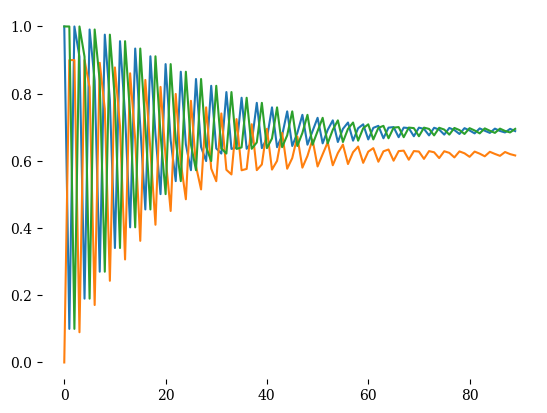

In [124]:
# Define the cyclic transition matrix
A = np.array([
    [0, 1, 0.1],
    [0, 0, 0.9],
    [1, 0, 0]
])

x_0 = array([[1,0,1]]).T
x_n = x_0
N = 90
xs = np.zeros([3, N])
for i in range(N):
    xs[:,i] = x_n[:,0]
    x_n = A@x_n

print(x_n)
plot(xs.T);


In [122]:
λs, Vs =eig(A)
λs

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

### Complex eigenvalues in Markov systems indicate oscillatory behavior.
If the manitudes of the complex eigenvalues are < 1, they decay over time, leaving the steady state associated to the $\lambda=1$ eigenvalue. If they have magnitude 1, they dont decau and we see non convergent oscillattory behavior.

## Eigenvalues in State Space System Description

In [56]:
import scipy.signal as sig

In [86]:
num = [10, 3]
den = np.array([1 , 3 , 2])
sys = sig.TransferFunction(num, den)

In [87]:
sys.poles

array([-2., -1.])

In [88]:
sys.zeros

array([-0.3])

In [89]:
ω, mag, ϕ = sig.bode(sys)

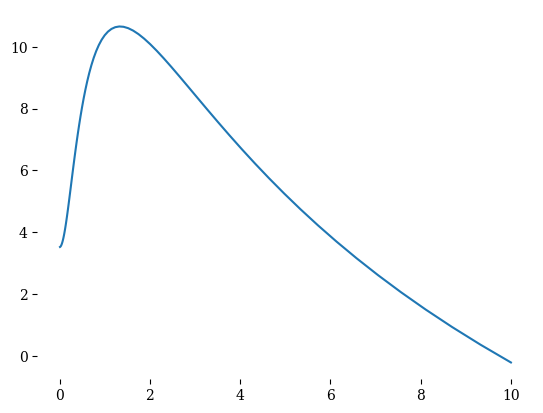

In [90]:
plot(ω, mag)

In [94]:
ss_sys = sys.to_ss()

In [97]:
λ, Vs = eig(ss_sys.A)

In [98]:
λ

array([-2., -1.])

## Eigenvalues of the A matrix in state-space are the poles!
See eg. https://www.youtube.com/watch?v=x-gVDJr3118

In [1]:
import sympy as sp

In [144]:
ss_sys.A

array([[-3., -2.],
       [ 1.,  0.]])

In [147]:
A = sp.Matrix(ss_sys.A)
A

Matrix([
[-3.0, -2.0],
[ 1.0,    0]])

In [150]:
A.det()

2.00000000000000

In [3]:
a = 0.5
b = 1
c = 0.75
d = 1.5

A = sp.Matrix([[a, b],[c, d]])
A

Matrix([
[ 0.5,   1],
[0.75, 1.5]])

In [34]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Determinante:  4.0


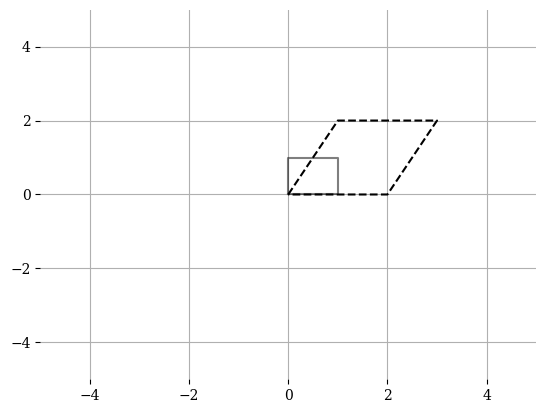

In [33]:

v = array([[0, 0],[0,1], [1,1], [1,0], [0,0]]).T
A = np.array([[2, 1],
              [0, 2]])

print("Determinante: ", det(A))
v2 = A@v
plot(v[0], v[1], 'k', alpha=0.5)
plot(v2[0], v2[1], 'k--')
xlim(-5,5)
ylim(-5,5)
grid()

In [40]:
# @interact()
def plotTransform(a,b,c,d):
    
    v = array([[0, 0],[0,1], [1,1], [1,0], [0,0]]).T
    A = np.array([[a, c],
                  [b, d]])

    print("Determinante: ", det(A))
    v2 = A@v
    plot(v[0], v[1], 'k', alpha=0.5)
    plot(v2[0], v2[1], 'r--')
    xlim(-5,5)
    ylim(-5,5)
    grid();

## Abbildungen und Determinante
Zur intuition: https://www.youtube.com/watch?v=Ip3X9LOh2dk&t=149s

In [41]:
interact(plotTransform, a=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1),
         b=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0),
         c=widgets.FloatSlider(min=-3, max=3, step=0.1, value=0),
         d=widgets.FloatSlider(min=-3, max=3, step=0.1, value=1))


interactive(children=(FloatSlider(value=1.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

<function __main__.plotTransform(a, b, c, d)>